In [1]:
from pathlib import Path
path = Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset')

In [2]:
# Download dataset with Kaggle API
# ! kaggle datasets download lavaman151/plantifydr-dataset --unzip

In [3]:
from fastai.vision.all import *

In [4]:
path.ls()

(#10) [Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Bell pepper'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Corn'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Grape'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Strawberry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Citrus'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Cherry'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Peach'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Potato'),Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Apple')]

In [5]:
plant_list = ['Apple','Bell pepper','Cherry','Citrus','Corn','Grape','Peach','Potato','Strawberry','Tomato']
plant = 'Tomato'

In [6]:
model_path = Path(path/plant)

In [7]:
batch_tfms=[*aug_transforms(),Normalize.from_stats(*imagenet_stats)]

In [8]:
dls = ImageDataLoaders.from_folder(path/plant,train='train',valid='valid',seed=1000,item_tfms=
                                   Resize(224),batch_tfms=batch_tfms,bs=64)

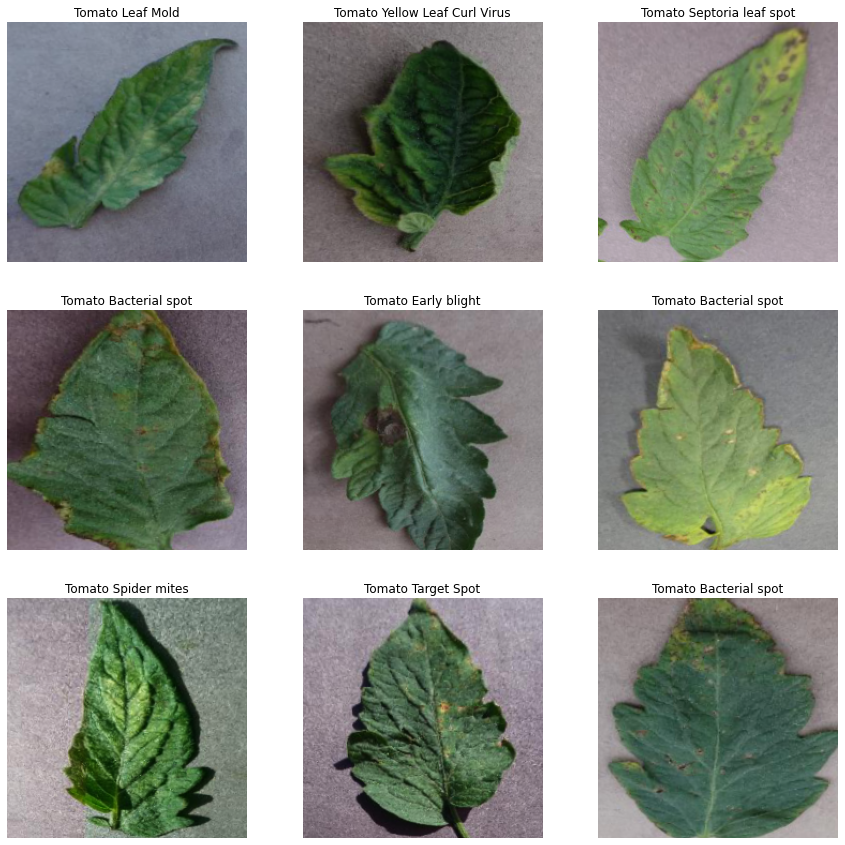

In [9]:
dls.show_batch(figsize=(15,15))

In [10]:
f1 = F1Score(average='weighted')

In [11]:
learn = cnn_learner(dls, models.resnet50,loss_func=LabelSmoothingCrossEntropy(),metrics=[accuracy,f1],
                    cbs=[SaveModelCallback(monitor='accuracy'),
                         EarlyStoppingCallback(monitor='accuracy',patience=2)],
                    model_dir=model_path/'models')

In [12]:
# Apple - 92.5%
# Bell pepper - 90.5%
# Cherry - 85.5%
# Citrus - 90.5%
# Grape - 84.8%
# Corn - 
# Peach - 92.5% 
# Potato - 
# Strawberry - 99%
# Tomato - 
learn.fit_sgdr(3,1)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.704570,1.719911,0.470000,0.428560,03:51
1,0.602031,1.537888,0.570000,0.517121,03:49
2,0.573660,1.476134,0.560000,0.507039,03:49
3,0.579146,1.370836,0.630000,0.599809,03:49
4,0.561114,1.415764,0.640000,0.592961,03:49
5,0.547229,1.328676,0.660000,0.618826,03:49
6,0.546343,1.325663,0.640000,0.605464,03:49


Better model found at epoch 0 with accuracy value: 0.4699999988079071.
Better model found at epoch 1 with accuracy value: 0.5699999928474426.
Better model found at epoch 3 with accuracy value: 0.6299999952316284.
Better model found at epoch 4 with accuracy value: 0.6399999856948853.
Better model found at epoch 5 with accuracy value: 0.6600000262260437.


In [13]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.565309,1.358091,0.620000,0.592348,03:49


Better model found at epoch 0 with accuracy value: 0.6200000047683716.


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.565112,1.447416,0.580000,0.545983,04:53
1,0.556330,1.592885,0.520000,0.480662,04:52
2,0.539466,1.353460,0.650000,0.627229,04:52
3,0.525587,1.242746,0.680000,0.649266,04:52
4,0.518265,1.206695,0.690000,0.662352,04:52


Better model found at epoch 0 with accuracy value: 0.5799999833106995.
Better model found at epoch 2 with accuracy value: 0.6499999761581421.
Better model found at epoch 3 with accuracy value: 0.6800000071525574.
Better model found at epoch 4 with accuracy value: 0.6899999976158142.


In [14]:
learn.save(model_path/f'models/{plant}')

Path('/home/alilavaee/Desktop/plantifydr/PlantDiseasesDataset/Tomato/models/Tomato.pth')

In [15]:
learn = cnn_learner(dls, models.resnet50).load(model_path/f'models/{plant}')

In [16]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                               512        True      
ReLU                                                           
__________________________________________

In [17]:
learn.export(f'{plant}.pkl')